# Linear Regression

## Sales Prediction (marketing-vs-Sales)
### Build a multiple linear model which predicts sales based on the money spent on different platforms for marketing

### Load Data

In [35]:
import pandas as pd
marketing_data = pd.read_csv('./data/marketing-sales.csv')
marketing_data.head()


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


### Data Cleaning and handling empty data

In [36]:

marketing_data =marketing_data.fillna(marketing_data.mean())

### Exploratory Data Analysis

<Figure size 1000x500 with 0 Axes>

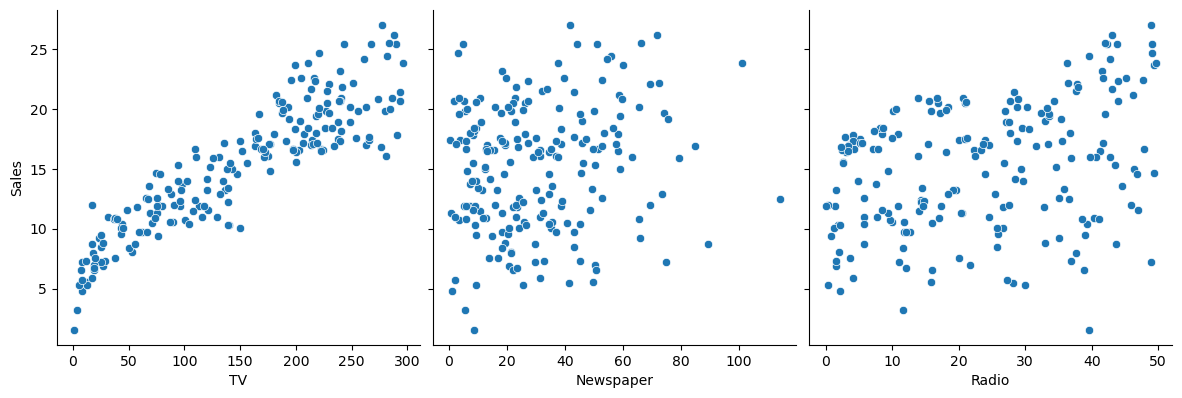

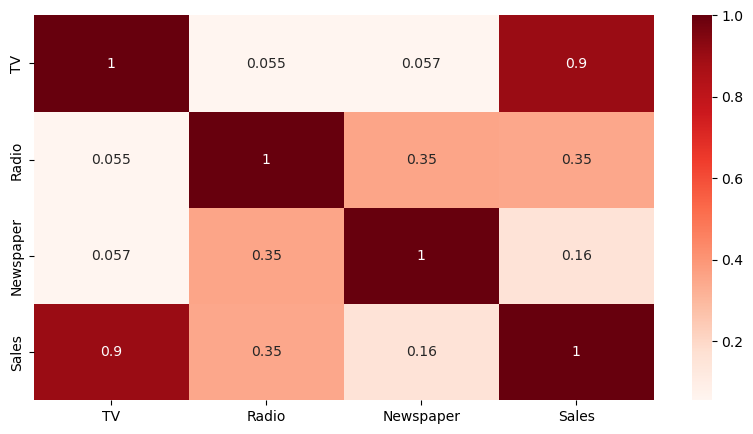

In [37]:
import matplotlib.pyplot as plt
import seaborn as sns

# scattered plot between TV-Sales, Newspaper-Sales, Radio-Sales
plt.figure(figsize=(10,5))
sns.pairplot(marketing_data, x_vars=['TV', 'Newspaper', 'Radio'], y_vars='Sales', height=4, aspect=1, kind='scatter')
plt.show()

# Hitmap to findout the correlation between variables
plt.figure(figsize=(10,5))
sns.heatmap(marketing_data.corr(), cmap="Reds", annot = True)
plt.show()

### Build Multiple Linear Regression Model
- TV, Radio, Newspaper are features (x1,x2,x3)
- Sales is Label (y)

**Equation**
$y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \cdots + \beta_n x_n + \epsilon$


#### Prepare Train-Train Dataset

In [38]:
from sklearn.model_selection import train_test_split
# Define features (X) and target (y)
X = marketing_data[['TV', 'Radio', 'Newspaper']]
y = marketing_data['Sales']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



#### Build Model

In [39]:
from sklearn.linear_model import LinearRegression

# Initialize the model
sales_model = LinearRegression()
# fit data to the model
sales_model.fit(X_train, y_train)

# Print the coefficients 
print("Coefficients:", sales_model.coef_)
print("Intercept:", sales_model.intercept_)

Coefficients: [0.05450927 0.10094536 0.00433665]
Intercept: 4.714126402214134


#### Evaluate Model

In [40]:
from sklearn.metrics import mean_squared_error, r2_score
# Make predictions
y_pred = sales_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)


Mean Squared Error: 2.907756910271091


#### Inferences (Use model in real-world)

In [41]:
import numpy as np
import warnings

# Suppress warnings globally
warnings.filterwarnings("ignore", category=UserWarning)


# Single data point for inference
tv_ad_cost = 200
radio_ad_cost = 25
news_ad_cost = 40
# create 1x array_len matrix (column matrix)
single_data = np.array([tv_ad_cost,radio_ad_cost,news_ad_cost]).reshape(1,3)
print(single_data)
# Predict sales for the single data point
single_prediction = sales_model.predict(single_data)

# Display the prediction
print(f"Advertising Budget (TV: {single_data[0][0]}, Radio: {single_data[0][1]}, Newspaper: {single_data[0][2]}) -> Predicted Sales: {single_prediction[0]:.2f}")

[[200  25  40]]
Advertising Budget (TV: 200, Radio: 25, Newspaper: 40) -> Predicted Sales: 18.31


#### Homework (Should be included in this notebook and also should be present in assignment PDF)
- Load the dataset and understand the features 
- Perform data preprocessing (handle missing values, normalization if needed).
- Perform Exploratory Data Analysis
- Split the dataset into training and testing sets.
- Build a Multiple Linear Regression model 
- Evaluate the model’s performance with R-squared and Root Mean Squared 
- Investigate the correlation between features and target and provide an explanation based on model coefficients.

**GROUP A**
- Build a Multiple Linear Regression model to predict house prices from the Boston Housing Dataset
-  https://github.com/selva86/datasets/blob/master/BostonHousing.csv

**GROUP B**
- Train a Multiple Linear Regression model to predict the car price
- https://archive.ics.uci.edu/dataset/19/car+evaluation

**GROUP C**
- Build a Multiple Linear Regression model to predict the student's final grade
- https://archive.ics.uci.edu/dataset/320/student+performance

**GROUP D**
- Predicting Heart Disease Risk (Heart Disease Dataset)
- https://archive.ics.uci.edu/dataset/45/heart+disease

# Classification
### Gaussian Naive Bayes Classifier

#### Load, and prepare dataset

In [42]:
from sklearn.datasets import load_iris
from IPython.display import display
# Load the Iris dataset
iris = load_iris()
# create new dataframe from iris data
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['species'] = iris.target
iris_df['species'] = iris_df['species'].map({0: 'setosa', 1: 'versicolor', 2: 'virginica'})

display(iris_df.head())
X = iris_df[['sepal length (cm)',	'sepal width (cm)',	'petal length (cm)'	,'petal width (cm)']]  
y = iris_df['species']  # Target (species: 0=setosa, 1=versicolor, 2=virginica)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Split data into test and train dataset

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#### Train the GNB Classifier

In [44]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

#### Make Predictions

In [45]:
# Make predictions
y_pred = gnb.predict(X_test)

#### Evaluate the model


In [47]:
from sklearn.metrics import accuracy_score, classification_report

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", )
print(classification_report(y_test, y_pred))

Accuracy: 1.0

Classification Report:

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



#### Homework (Should be included in this notebook and also should be present in assignment PDF)
- Load the dataset and understand the features
- Perform data processing
- Perform Exploratory Data Analysis
- Visualize the data using various graphs 
- Split the dataset into training and testing sets
- Build a Gaussian Naive Bayes (GNB) classification model
- Evaluate the model's performance
- Investigate the impact of each feature

#### **GROUP A: Predicting Car Evaluation**

**Dataset**: [Car Evaluation Dataset](https://archive.ics.uci.edu/ml/datasets/car+evaluation)


- Build a GNB model to classify cars into categories such as “unacceptable,” “acceptable,” and “good” based on features like buying price, maintenance cost, number of doors, and more.

---

#### **GROUP B: Predicting Heart Disease Risk**

**Dataset**: [Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/heart+disease)


- Build a GNB model to predict whether an individual has heart disease based on features such as age, sex, cholesterol levels, and blood pressure.

---

#### **GROUP C: Predicting Breast Cancer Diagnosis**

**Dataset**: [Breast Cancer Wisconsin Diagnostic Dataset](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+diagnostic)


- Build a GNB model to classify breast cancer diagnoses as **malignant** or **benign** based on features like mean radius, texture, and smoothness.

---

#### **GROUP D: Predicting Pima Indians Diabetes**

**Dataset**: [Pima Indians Diabetes Dataset](https://github.com/npradaschnor/Pima-Indians-Diabetes-Dataset/blob/master/diabetes.csv)


- Build a GNB model to predict whether a person has diabetes based on features like age, BMI, insulin levels, and blood pressure.



### Evaluation Criteria:
- **Accuracy**: Measures the proportion of correct predictions.
- **Precision**: Indicates the proportion of true positives out of all predicted positives.
- **Recall**: Measures the proportion of true positives out of all actual positives.
- **F1-Score**: A harmonic mean of precision and recall, useful for imbalanced datasets.
- **Confusion Matrix**: A table that summarizes the performance of the model by showing the number of true positives, true negatives, false positives, and false negatives.
